기존 데이터 설명
* VMI란?
* 수요를 통해 공급할 재고 예측
* 판매자가 구매자에게 재고를 정해서 판매
* CRET_TIME : 재고 생성 시간

1. 데이터 전처리

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/VMI_data.xls')
df.head(3)

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
1,Part 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
2,Part 2,139,60,80,76,68,81,68,44,0,...,0,0,0,0,0,0,0,0,0,202109131830


In [11]:
df.columns

Index(['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량',
       'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량',
       'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량',
       'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량',
       'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)',
       'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2',
       'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5',
       'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8',
       'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)',
       'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2',
       'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4',
       'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6',
       'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8',
       'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)',
       'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(

In [12]:
# 당일 부터 4일 차까지는 세분화 되어있으므로, Total만 가져오고, 열 삭제

for idx in range(1,6):
    idx_start, idx_end = idx, idx+10
    df.drop(df.columns[idx_start:idx_end], axis = 1, inplace=True)

df.columns

Index(['Part Number', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)',
       'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(Total)', 'D+4일 투입예정 수량(Total)',
       'D+5일 투입예정 수량', 'D+6일 투입예정 수량', 'D+7일 투입예정 수량', 'D+8일 투입예정 수량',
       'D+9일 투입예정 수량', 'D+10일 투입예정 수량', 'D+11일 투입예정 수량', 'D+12일 투입예정 수량',
       'D+13일 투입예정 수량', 'D+14일 투입예정 수량', 'D+15일 투입예정 수량', 'D+16일 투입예정 수량',
       'D+17일 투입예정 수량', 'D+18일 투입예정 수량', 'D+19일 투입예정 수량', 'D+20일 투입예정 수량',
       'D+21일 투입예정 수량', 'D+22일 투입예정 수량', 'D+23일 투입예정 수량', 'D+24일 투입예정 수량',
       'D+25일 투입예정 수량', 'D+26일 투입예정 수량', 'D+27일 투입예정 수량', 'D+28일 투입예정 수량',
       'D+29일 투입예정 수량', 'D+30일 투입예정 수량', 'D+31~D+45일 투입예정 수량', 'CRET_TIME'],
      dtype='object')

In [13]:
# 연도-월-일-시간으로 변경
df['CRET_TIME']=df['CRET_TIME'].astype(str)
df['CRET_TIME'] = pd.to_datetime(df['CRET_TIME'], format='%Y%m%d%H%M')
df[['CRET_TIME']].head(3)
df.head(3)

,Part Number,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:30:00
1,Part 1,0,0,0,0,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:30:00
2,Part 2,616,560,590,588,532,0,0,451,523,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:30:00


In [14]:
# values : 1번째 열만 사용
df.drop(df.columns[2:33], axis=1, inplace=True)
df.rename(columns={'D일 투입예정 수량(D일계획)':'Work_Plan'},inplace=True)
df

,Part Number,Work_Plan,CRET_TIME
0,Part 0,0,2021-09-13 18:30:00
1,Part 1,0,2021-09-13 18:30:00
2,Part 2,616,2021-09-13 18:30:00
3,Part 3,104,2021-09-13 18:30:00
4,Part 4,187,2021-09-13 18:30:00
...,...,...,...
17359,Part 105,0,2021-11-01 07:03:00
17360,Part 112,0,2021-11-01 07:03:00
17361,Part 106,364,2021-11-01 07:03:00
17362,Part 107,269,2021-11-01 07:03:00


In [15]:
df_work_plan=df.pivot_table(index='Part Number', columns='CRET_TIME', values='Work_Plan', aggfunc='sum')
df_work_plan=df_work_plan.fillna(value=0).astype(int)
df_work_plan.head(5)

CRET_TIME,2021-09-13 18:30:00,2021-09-14 06:05:00,2021-09-14 06:25:00,2021-09-14 06:34:00,2021-09-14 17:30:00,2021-09-15 06:20:00,2021-09-15 06:37:00,2021-09-15 16:33:00,2021-09-16 06:32:00,2021-09-16 06:38:00,...,2021-10-28 15:30:00,2021-10-28 16:26:00,2021-10-29 06:30:00,2021-10-29 06:32:00,2021-10-29 07:06:00,2021-10-29 12:34:00,2021-10-29 15:03:00,2021-10-29 15:38:00,2021-10-30 07:04:00,2021-11-01 07:03:00
Part Number,,,,,,,,,,,,,,,,,,,,,
Part 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part 10,16,16,16,16,16,16,16,16,23,23,...,178,178,178,156,156,156,156,156,156,104
Part 100,38,38,35,35,35,40,40,40,38,38,...,33,33,33,23,23,23,23,23,23,0
Part 101,0,0,0,0,0,77,77,77,78,78,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_ts=df_work_plan.loc[['Part 37']].T
df_ts

Part Number,Part 37
CRET_TIME,
2021-09-13 18:30:00,207
2021-09-14 06:05:00,207
2021-09-14 06:25:00,138
2021-09-14 06:34:00,138
2021-09-14 17:30:00,138
...,...
2021-10-29 12:34:00,125
2021-10-29 15:03:00,125
2021-10-29 15:38:00,125


In [47]:
df_ts.shape

(153, 1)

## 3. Time Series 데이터 전처리

### 3.1 Time Sequence

In [48]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(df_ts, seq_length)

In [49]:
df_ts.shape

(153, 1)

In [50]:
pd.DataFrame(X[:,:,0])

,0,1,2,3,4
0,207,207,138,138,138
1,207,138,138,138,162
2,138,138,138,162,162
3,138,138,162,162,162
4,138,162,162,162,303
...,...,...,...,...,...
143,129,129,129,125,125
144,129,129,125,125,125
145,129,125,125,125,125
146,125,125,125,125,125


### 3.2 Train/Val/Test Split

In [52]:
train_size = int(148 * 0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+15], y[train_size:train_size+15]
X_test, y_test = X[train_size+15:], y[train_size+15:]

### 3.3 MinMaxScaler

In [53]:
MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)

X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)

X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

### 3.4 Torch Tensor 변환

In [54]:
import torch

def make_tensor(array):
    return torch.from_numpy(array).float()

X_train = make_tensor(X_train)
y_train = make_tensor(y_train)

X_val = make_tensor(X_val)
y_val = make_tensor(y_val)

X_test = make_tensor(X_test)
y_test = make_tensor(y_test)

## 4. LSTM Time Series

### 4.2 LSTM Model

In [55]:
from torch import nn, optim

class LSTM(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(LSTM, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

### 4.3 Training

In [56]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #L1Loss=MAE Loss
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    
    for t in range(num_epochs):
        epoch_loss = 0
        for idx, seq in enumerate(train_data): 
            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()
        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:
            with torch.no_grad():
                val_loss = 0
                for val_idx, val_seq in enumerate(val_data):
                    model.reset_hidden_state() # seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss                
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :
                    print('\n Early Stopping')
                    break
        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')
            
    return model, train_hist, val_hist

In [60]:
model_lstm = LSTM(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1)
print(model_lstm)

LSTM(
  (lstm): LSTM(1, 4)
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


In [61]:
model_lstm, train_hist, val_hist = train_model(
    model_lstm,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50)

Epoch 0 train loss: 0.6952549006979344 val loss: 0.4565318524837494
Epoch 10 train loss: 0.12246929134352733 val loss: 0.05022045597434044
Epoch 20 train loss: 0.04859646820163323 val loss: 0.02102091535925865
Epoch 30 train loss: 0.037967244826130946 val loss: 0.019707176834344864
Epoch 40 train loss: 0.0344643001839266 val loss: 0.018750812858343124
Epoch 50 train loss: 0.03579364098229651 val loss: 0.019997915253043175
Epoch 60 train loss: 0.035655982350393876 val loss: 0.022657373920083046
Epoch 70 train loss: 0.03582684651522313 val loss: 0.01942283660173416
Epoch 80 train loss: 0.03623987709061574 val loss: 0.020059537142515182
Epoch 90 train loss: 0.03481726771441557 val loss: 0.01960795372724533


### 4.4 Loss Visualization

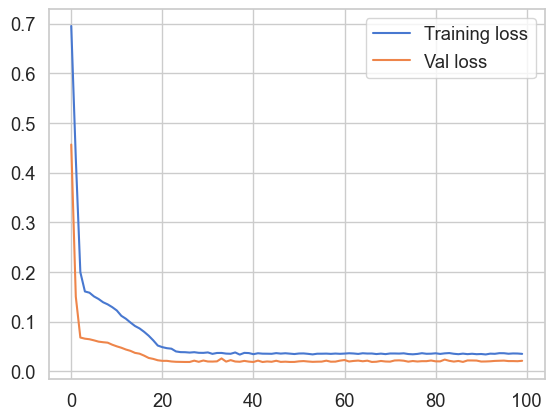

In [62]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

### 4.5 Inference & Evaluate

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred):
    print('* MAE:', mean_absolute_error(y_test, y_pred))
    print('* RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('* R_Square:', r2_score(y_test, y_pred))

In [64]:
pred_dataset = X_test

with torch.no_grad():
    preds_lstm = []
    for _ in range(len(pred_dataset)):
        model_lstm.reset_hidden_state()
        y_test_pred = model_lstm(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds_lstm.append(pred)

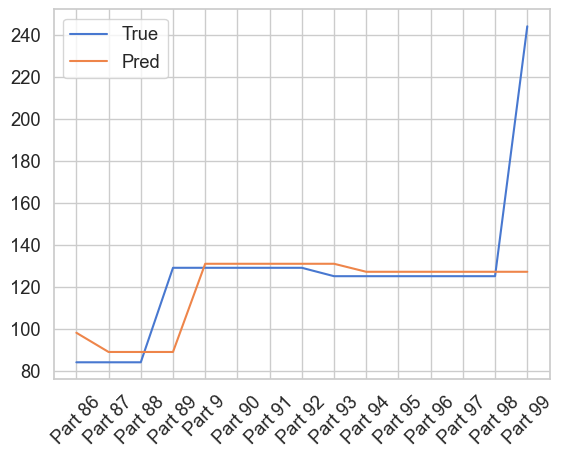

In [65]:
plt.plot(df_work_plan.index[-len(y_test):], np.array(y_test) * MAX, label='True')
plt.plot(df_work_plan.index[-len(preds_lstm):], np.array(preds_lstm) * MAX, label='Pred')
plt.xticks(rotation=45)
plt.legend()

In [66]:
evaluate(np.array(y_test)*MAX, np.array(preds_lstm)*MAX)

* MAE: 13.663777458667756
* RMSE: 32.23861176833082
* R_Square: 0.19084557937370983
